## Practice final exam

#### Instructions:
- Complete the tasks listed in this notebook by answering questions and writing the code in the cell provided
- Each task has a number of points associated with it, the complete exam assignment has 100 points
- The grade is the total number of points earned
- Started but not completed tasks, as well as task completed with errors earn partial points
- You will have 120 minutes to compete the exam, this practice exam is calibrated for 30 minutes

### question 1 (2 points)
What are the necessary components of a class code in Python?

Answer: 

In [1]:
class exam_class():
    
    '''This is a class'''
    
    def __init__(self, a,b):
        self.a=a
        self.b=b

### question 2 (2 points)
Name 10 different optimization methods available in Python, and give a typical use case for each.

Answer:

 - Nelder-Mead, unconstrainted opt.
 - Powell, unconstrainted opt.
 - CG, unconstrainted opt.
 - Newton-CG, unconstrainted opt., know Jacobian
 - Brute force, lots of computation power, when desperate
 - Brent-Q, know the sign-changing interval, can express optimization function as a root-finding problem
 - Bisection, know the sign-changing interval, function behaves well
 - Newton-Raphson, provide Jacobian
 - Ridder, know the sign-changing interval, function behaves well
 - dogleg, know initial trust region radius

### question 3 (2 points)
Compute the stationary distribution of a Markov chain given by the following transition probability

$$
p=
\begin{pmatrix} 
0.1 & 0.1 & 0 & 0.8 \\
0 & 0.4 & 0.4 & 0.2 \\
0.9 & 0.1 & 0 & 0 \\
0.3 & 0.2 & 0.3 & 0.2 \\
\end{pmatrix}
$$


In [3]:
import numpy as np
p = np.array([[0.1,0.1,0,0.8],[0,0.4,0.4,0.2],[0.9,0.1,0,0],[0.3,0.2,0.3,0.2]])

In [6]:
def solveStationary(A):
    """ x = xA where x is the answer
    x - xA = 0
    x( I - A ) = 0 and sum(x) = 1
    """
    n = A.shape[0]
    a = np.eye( n ) - A
    a = np.vstack( (a.T, np.ones( n )) )
    b = np.matrix( [0] * n + [ 1 ] ).T
    return np.linalg.lstsq( a, b )[0]

In [7]:
solveStationary(p)

matrix([[ 0.29130435],
        [ 0.19130435],
        [ 0.17826087],
        [ 0.33913043]])

### question 4 (2 points)
What is the best approximation scheme on $[0,1]$ for the function shown below. Why?

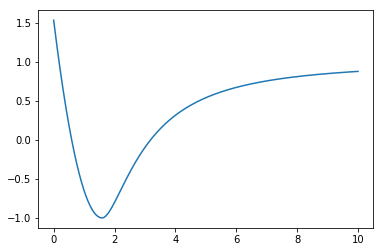

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    res=(x-5/np.pi)**2-1
    m=x>5/np.pi
    res[m]=np.cos(5/x[m])
    return res

plt.plot(np.linspace(0,10,1000),f(np.linspace(0,10,1000)))

Answer: A cubic spline works, because func is well behaved, smooth and does not have large kinks.

### question 5 (2 points)
The code below is intended for repeated generation of the same sequence of random numbers, but does not work. Fix the bug.

In [9]:
import numpy as np
for i in range(10):
    # generate sequence of five numbers
    np.random.seed(559443)
    r = np.random.uniform(1,10,5)
    print(r)

[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]
[ 4.30530135  6.7695947   7.05474089  8.3986615   6.96577845]


### question 6 (5 points)

Write a short code to output 10 smallest and 10 largest representable float64 numbers as a NumPy array.

In [114]:
maxf = np.finfo('float64').max
minf = np.finfo('float64').min
eps=np.finfo('float64').eps

print(np.array([maxf - eps*i for i in range(10)]))
print(np.array([minf + eps*i for i in range(10)]))


[  1.79769313e+308   1.79769313e+308   1.79769313e+308   1.79769313e+308
   1.79769313e+308   1.79769313e+308   1.79769313e+308   1.79769313e+308
   1.79769313e+308   1.79769313e+308]
[ -1.79769313e+308  -1.79769313e+308  -1.79769313e+308  -1.79769313e+308
  -1.79769313e+308  -1.79769313e+308  -1.79769313e+308  -1.79769313e+308
  -1.79769313e+308  -1.79769313e+308]


### question 7 (10 points)

Write a short code to run a Monte Carlo experiment for investigating the variability of linear regression estimates.  Perform the following steps:
1. Simulate 100 $x_i$ values between 0 and 10 using uniform distribution
2. Simulate 100 $\varepsilon_i$ values using normal distribution with zero mean and standard deviation 0.5
3. Compute 100 values $y_i = \alpha + \beta x_i + \varepsilon_i$, where true parameters are $\alpha=-2.5$ and $\beta=1.2$
4. Treat pairs $(x_i,y_i)$ as data and estimate the coefficients of linear regressions using the formula

$$
(\hat{\alpha},\hat{\beta})= \big[ (X'X)^{-1}X'Y \big]',
$$

where $X$ is the matrix composed of a column of ones and a column of stacked $x_i$, and $Y$ is the column vector of stacked $y_i$.
5. Print and save the resulted estimates
6. Repeat the same steps for 25 MC runs

Present the result graphically. One plot should picture a typical estimation result (say, from first run of the steps above): it should show the dots representing 100 data points $x_i,y_i$, and the fitted line 
$y = \hat{\alpha} + \hat{\beta}x$.
The other plot should picture together the 25 lines fitted in the MC exercise.

Afterwards, print the MC average estimates of $\alpha$ and $\beta$ and compare to the true values.


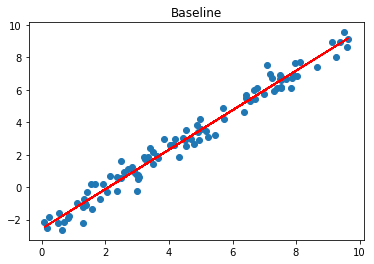

Regression formula:-2.55+1.22x


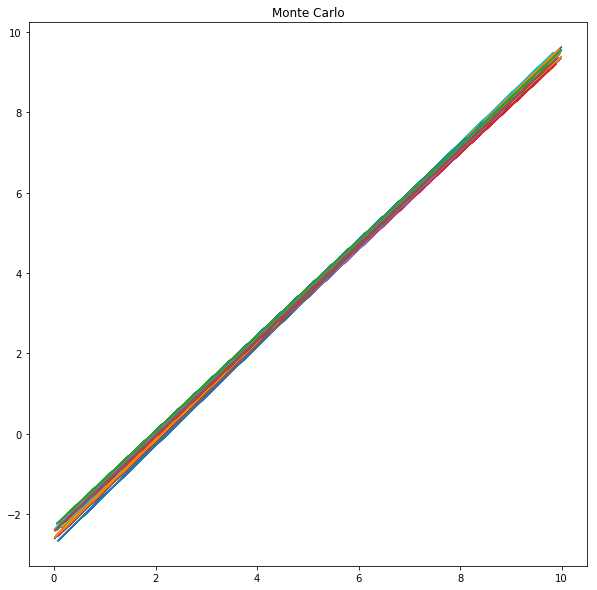

MC Regression formula:-2.50+1.20x


In [96]:
import numpy.random as rd
import matplotlib.pyplot as plt
import random as random
random.seed()
def reg():
    x = rd.uniform(0,10,100).reshape(100,1)
    e = rd.normal(0,0.5,100).reshape(100,1)

    α, β = -2.5, 1.2

    y = α + β*x + e

    o = np.full((100,1),1,dtype=int)
    x_m = np.concatenate((o,x),axis=1)

    coeff = (np.linalg.inv(x_m.T@x_m)@x_m.T@y)
    pred_y = coeff[0] + coeff[1]*x
    return x,y,pred_y,coeff

f, ax = plt.subplots(1,1)
x,y,pred_y,coeff = reg()
ax.scatter(x,y)
ax.plot(x, pred_y, color='red')
ax.set_title('Baseline')
plt.show()
print('Regression formula:{:.2f}+{:.2f}x'.format(float(coeff[0]),float(coeff[1])))

g, ax = plt.subplots(1,1,figsize=(10,10))
a,b = [], []
for i in range(26):
    x,y,pred_y,coeff = reg()
    ax.plot(x, pred_y)
    a.append(float(coeff[0]))
    b.append(float(coeff[1]))
ax.set_title('Monte Carlo')
plt.show()
print('MC Regression formula:{:.2f}+{:.2f}x'.format(np.array(a).mean(),np.array(b).mean()))

In [ ]:
# small changes